In [2]:
import perceval as pcvl
from perceval.polyquantique.algorithm.BasicStateJitter import BasicStateJitter,Source
from perceval.polyquantique.algorithm.ProcessorJitter import ProcessorJitter
from perceval.polyquantique.algorithm.DistributionEnvelope import Schmidt
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc 

## Find the Experimental data

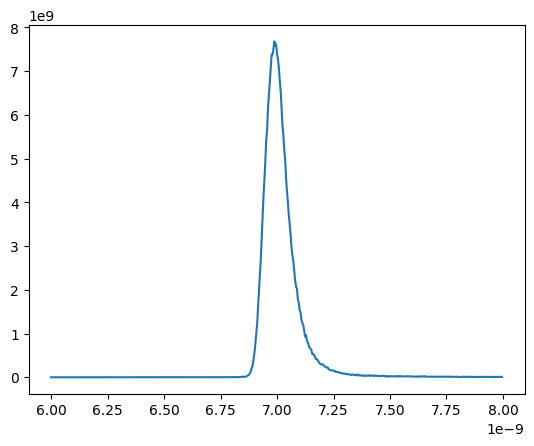

In [62]:
import json
import matplotlib.pyplot as plt

f = open('C:/Users/guill/Documents/Perceval/perceval/polyquantique/Data/acquired_data/xp_00/data.json')
data = json.load(f)
min,max = 1500 , 2000
x = np.array(data['delay data']['ch3']['x'][min:max])*1e-12
y = np.array(data['delay data']['ch3']['y'][min:max]/sc.integrate.simps(data['delay data']['ch3']['y'][min:max],x))
plt.plot(x,y)

## Functions

In [74]:
def expo(x,gamma):
    return gamma * np.exp(-gamma*x)* np.heaviside(x, 0.5)

def gaussian(x,sigma):
    return 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-(x**2) / (2 * sigma**2))

def func(x,gamma,sigma,offset):
    return np.convolve(expo(x-offset,gamma),gaussian(x-offset,sigma),mode='same')


## Find gama and sigma

In [75]:
popt, pcov = sc.optimize.curve_fit(func, x, np.array(y))
popt

C:\Users\guill\AppData\Roaming\Python\Python310\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


array([1., 1., 1.])

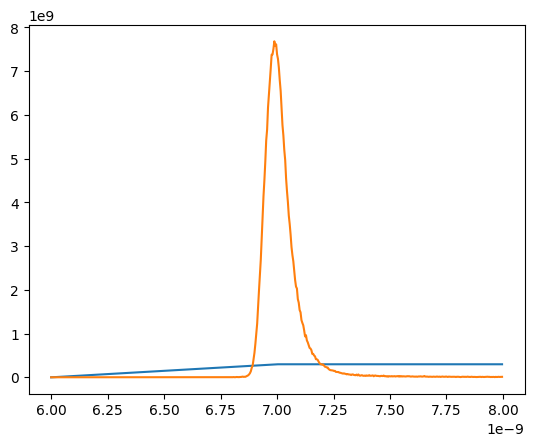

In [73]:
offset = 7000e-12
#plt.plot(x, expo(x-offset,0.007))
#plt.plot(x,gaussian(x-offset,100))
plt.plot(x,np.convolve(expo(x-offset,3e6),gaussian(x-offset,1),mode='same'))
plt.plot(x,y)

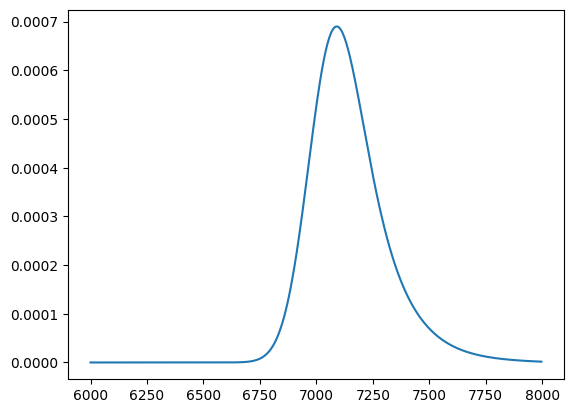

In [48]:
plt.plot(x,np.convolve(gaussian(x-7000,100),expo(x-7000,0.007),mode='same'))